In [1]:
import tensorflow as tf
import sklearn
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("8_Channels_MyoArmband_DNN_DATA_10poses.csv")
df.head()

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Class
0,62,205,164,199,158,46,24,22,0
1,70,251,177,208,158,48,25,25,0
2,66,249,174,179,140,47,24,26,0
3,75,235,177,190,135,51,25,28,0
4,70,221,200,177,118,46,23,27,0


In [3]:
df1=sklearn.utils.shuffle(df)
df1.head()

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Class
310244,49,114,415,139,52,52,43,73,6
189617,125,122,260,152,148,130,107,79,3
197459,104,121,332,116,90,65,74,66,3
106617,131,100,193,69,389,360,61,35,2
255829,47,207,354,201,90,52,47,37,5


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436197 entries, 310244 to 146285
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Channel_1  436197 non-null  int64
 1   Channel_2  436197 non-null  int64
 2   Channel_3  436197 non-null  int64
 3   Channel_4  436197 non-null  int64
 4   Channel_5  436197 non-null  int64
 5   Channel_6  436197 non-null  int64
 6   Channel_7  436197 non-null  int64
 7   Channel_8  436197 non-null  int64
 8   Class      436197 non-null  int64
dtypes: int64(9)
memory usage: 33.3 MB


In [5]:
X=df1.drop("Class",axis=1).values
Y=df1["Class"].values
X_train=X[:-25000]
Y_train=Y[:-25000]
X_test=X[-25000:]
Y_test=Y[-25000:]
X_train
Y_train

array([6, 3, 3, ..., 7, 6, 4])

In [6]:
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)
X_train

array([[0.10458036, 0.24330941, 0.88573162, ..., 0.11098324, 0.0917746 ,
        0.15580339],
       [0.29652256, 0.28940602, 0.61676693, ..., 0.30838347, 0.25382331,
        0.18740226],
       [0.25128251, 0.29235754, 0.80217109, ..., 0.15705157, 0.17879717,
        0.15946775],
       ...,
       [0.50796759, 0.43589111, 0.47707767, ..., 0.16474625, 0.29173814,
        0.28487372],
       [0.08874119, 0.3563093 , 0.10084226, ..., 0.59429703, 0.04302603,
        0.03092496],
       [0.43348369, 0.57228389, 0.49754532, ..., 0.13666481, 0.15161252,
        0.26265268]])

In [7]:
print(X_train.shape,Y_train.shape)

(411197, 8) (411197,)


In [8]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
model =tf.keras.Sequential([
    tf.keras.Input(shape=(8,)),  # input layer (1)
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'),# hidden layer (2)
    tf.keras.layers.Dense(16, activation='relu'),# hidden layer (2)
    tf.keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                170       
Total params: 5,978
Trainable params: 5,978
Non-trainable params: 0
_________________________________________________________________


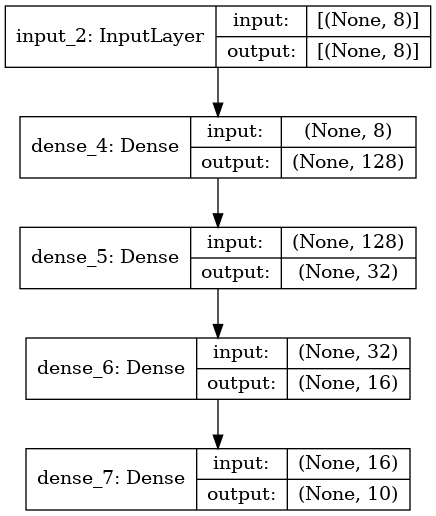

In [17]:
dot_img_file = '/tmp/model_1.png'

tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [18]:
import os

checkpoint_path = "DNN_model/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = model.fit(X_train, Y_train,
                    epochs = 5,
                    validation_data=(X_test, Y_test))
                    #callbacks=[cp_callback])


Epoch 1/5
12850/12850 [==============================] - 15s 1ms/step - loss: 1.0441 - accuracy: 0.6121 - val_loss: 0.5448 - val_accuracy: 0.8161
Epoch 2/5
12850/12850 [==============================] - 15s 1ms/step - loss: 0.5112 - accuracy: 0.8244 - val_loss: 0.4472 - val_accuracy: 0.8461
Epoch 3/5
12850/12850 [==============================] - 15s 1ms/step - loss: 0.4418 - accuracy: 0.8456 - val_loss: 0.4031 - val_accuracy: 0.8596
Epoch 4/5
12850/12850 [==============================] - 15s 1ms/step - loss: 0.4039 - accuracy: 0.8587 - val_loss: 0.3761 - val_accuracy: 0.8689
Epoch 5/5
12850/12850 [==============================] - 15s 1ms/step - loss: 0.3819 - accuracy: 0.8655 - val_loss: 0.3745 - val_accuracy: 0.8690


Text(0.5, 1.0, 'Training and validation loss')

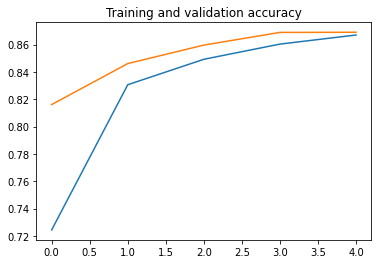

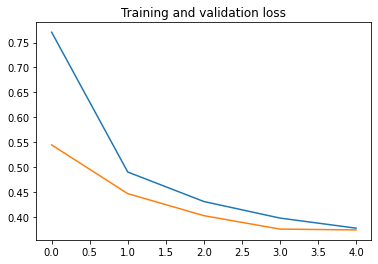

In [19]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [20]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=1) 

print('Test accuracy:', test_acc)

782/782 [==============================] - 1s 769us/step - loss: 0.3745 - accuracy: 0.8690
Test accuracy: 0.8690400123596191


In [21]:
import time
start_time = time.time()

predictions = model.predict(X_test)
predictions[20001]
print (np.argmax(predictions[20001]))

print("--- %s seconds ---" % (time.time() - start_time))

2
--- 0.4407167434692383 seconds ---


In [22]:
Y_test[20001]

2